In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import zipfile
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 82% 122M/149M [00:00<00:00, 163MB/s] 
100% 149M/149M [00:01<00:00, 151MB/s]


In [ ]:
# Descomprimir el archivo
with zipfile.ZipFile("brain-tumor-mri-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("braintumor")

print("✅ Dataset extraído correctamente")

✅ Dataset extraído correctamente


In [ ]:
data_dir_training = "/content/braintumor/Training"
data_dir_testing = "/content/braintumor/Testing"
data_train = "/content/braintumor/Training"
data_test = "/content/braintumor/Testing"

In [ ]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir_training,
    target_size=(128, 128),  # Redimensionar imágenes
    batch_size=64,
    class_mode="categorical",
    subset="training"
)

val_generator = datagen.flow_from_directory(
    data_dir_testing,
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

Found 4571 images belonging to 4 classes.
Found 262 images belonging to 4 classes.


In [ ]:
train_generator.class_indices.keys()

dict_keys(['glioma', 'meningioma', 'notumor', 'pituitary'])

In [ ]:
image_shapes = [Image.open(os.path.join(data_train, cls, img)).size for cls in train_generator.class_indices.keys() for img in os.listdir(os.path.join(data_train, cls))]
image_shapes = np.array(image_shapes)

# Ver los tamaños más comunes
shape_counts = Counter(map(tuple, image_shapes))
print("Tamaños de imagen más comunes:", shape_counts.most_common(5))


Tamaños de imagen más comunes: [((512, 512), 3955), ((225, 225), 268), ((630, 630), 77), ((236, 236), 53), ((201, 251), 43)]


In [ ]:
gray_count = 0
for cls in train_generator.class_indices.keys():
    for img in os.listdir(os.path.join(data_train, cls)):
        img_path = os.path.join(data_train, cls, img)
        img = Image.open(img_path)
        if len(np.array(img).shape) < 3:  # Si no tiene 3 dimensiones, es escala de grises
            gray_count += 1

print(f"Número de imágenes en escala de grises: {gray_count}")


Número de imágenes en escala de grises: 2473


Si algunas imágenes están en escala de grises y otras en RGB, es necesario convertirlas todas al mismo formato.

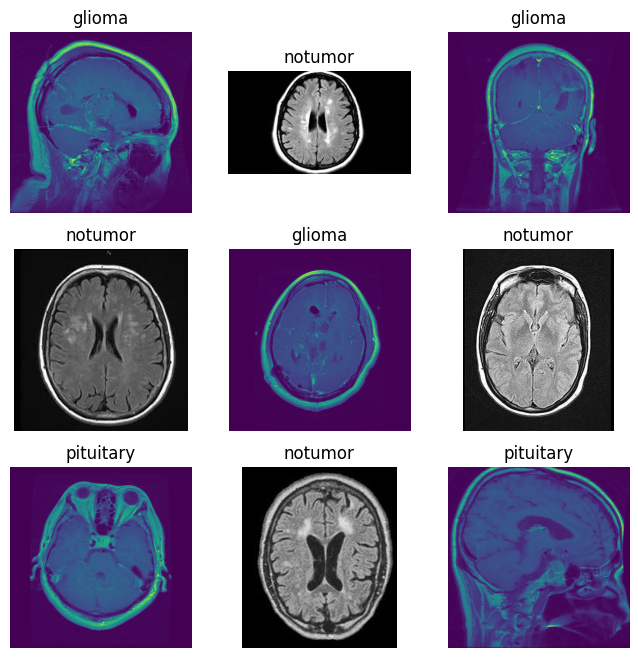

In [ ]:
import random

fig, axes = plt.subplots(3, 3, figsize=(8,8))

for ax in axes.ravel():
    random_class = random.choice(['glioma', 'meningioma', 'notumor', 'pituitary'])
    random_img = random.choice(os.listdir(os.path.join(data_train, random_class)))
    img = Image.open(os.path.join(data_train, random_class, random_img))
    ax.imshow(img)
    ax.set_title(random_class)
    ax.axis("off")

plt.show()


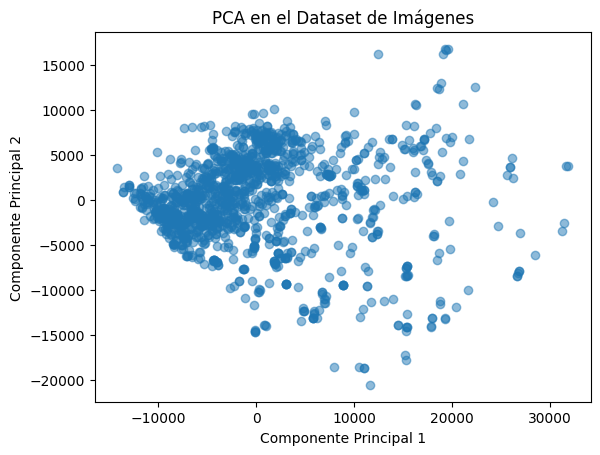

In [ ]:
from sklearn.decomposition import PCA

image_size = (224, 224)  # Tamaño fijo

image_vectors = []
for cls in os.listdir(data_test):
    class_path = os.path.join(data_test, cls)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        try:
            img = Image.open(img_path).convert("RGB")  # Asegurar RGB
            img = img.resize(image_size)  # Redimensionar
            img_vector = np.array(img).flatten()  # Convertir en vector

            image_vectors.append(img_vector)
        except Exception as e:
            print(f"Error con la imagen {img_name}: {e}")

# Convertir a un array de NumPy
image_vectors = np.array(image_vectors)

# Aplicar PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(image_vectors)


# Graficar
plt.scatter(reduced_data[:,0], reduced_data[:,1], alpha=0.5)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA en el Dataset de Imágenes")
plt.show()